In [1]:
!pip install matplotlib seaborn

  Using cached matplotlib-3.10.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp312-cp312-macosx_10_13_universal2.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp312-cp312-macosx_11_0_arm64.whl (8.0 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.5/255.5 kB 1.0 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp312-cp312-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.2.1-cp312-cp312-macosx

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
#read the data
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [6]:
df.shape

(29020, 18)

In [7]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(7661)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(21359, 18)

In [12]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
df["no_of_adults"].value_counts()
##### mostly we have couple or single member orders

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [14]:
df["no_of_children"].value_counts()
# most of the guest are couples

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [15]:
df["no_of_weekend_nights"].value_counts()
###### people do not prefer weeekends

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

In [16]:
df["no_of_week_nights"].value_counts()
###### most of them come for 2-3 days to stay

no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64

In [17]:
df["type_of_meal_plan"].value_counts()
##### most of the people prefer the standar meal plan 1

type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64

In [18]:
df["required_car_parking_space"].value_counts()
####### most of the guest come using public transport

required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

In [19]:
df["room_type_reserved"].value_counts()
###### most of the popel prefer room_type_1 i.e the smallest room -> this can accomodata 2,3 guest

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64

In [20]:
df["arrival_year"].value_counts()

arrival_year
2018    18141
2017     3218
Name: count, dtype: int64

In [21]:
df["arrival_month"].value_counts()

arrival_month
10    2663
9     2525
8     2477
12    1928
7     1893
11    1817
4     1695
3     1611
6     1543
5     1522
2     1067
1      618
Name: count, dtype: int64

In [22]:
df["market_segment_type"].value_counts()

market_segment_type
Online           16324
Offline           3471
Corporate         1192
Complementary      291
Aviation            81
Name: count, dtype: int64

In [23]:
df["repeated_guest"].value_counts()

repeated_guest
0    20667
1      692
Name: count, dtype: int64

In [24]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [25]:
########### data is imbalanced

In [26]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [27]:
## degining the categorical columsn
cat_col = [
    'type_of_meal_plan', 'required_car_parking_space','room_type_reserved','market_segment_type', 'repeated_guest','booking_status'
]

num_col = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',  'lead_time', 'arrival_year', 'arrival_month',
    'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 'no_of_special_requests'
]

In [28]:
len(cat_col)+len(num_col) == len(df.columns)

True

## data analysis

In [29]:
data = df.copy()

In [30]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


#### univarient analysys

In [31]:
def num_plot_distribution(df, num_features):
    fig, axs = plt.subplots(len(num_features), 2, figsize = (15, len(num_features)*5))

    if len(num_features)==1:
        axs = [axs]
    
    for i, col in enumerate(num_features):
        sns.histplot(data=df, x=col,ax = axs[i][0], kde=True, palette="Blues")
        axs[i][0].set_title(f"Historgram for {col}")

        sns.boxplot(data=df, x=col, ax=axs[i][1], palette="Blues")
        axs[i][1].set_title(f"Box plot for {col}")
    plt.tight_layout()
    plt.show()


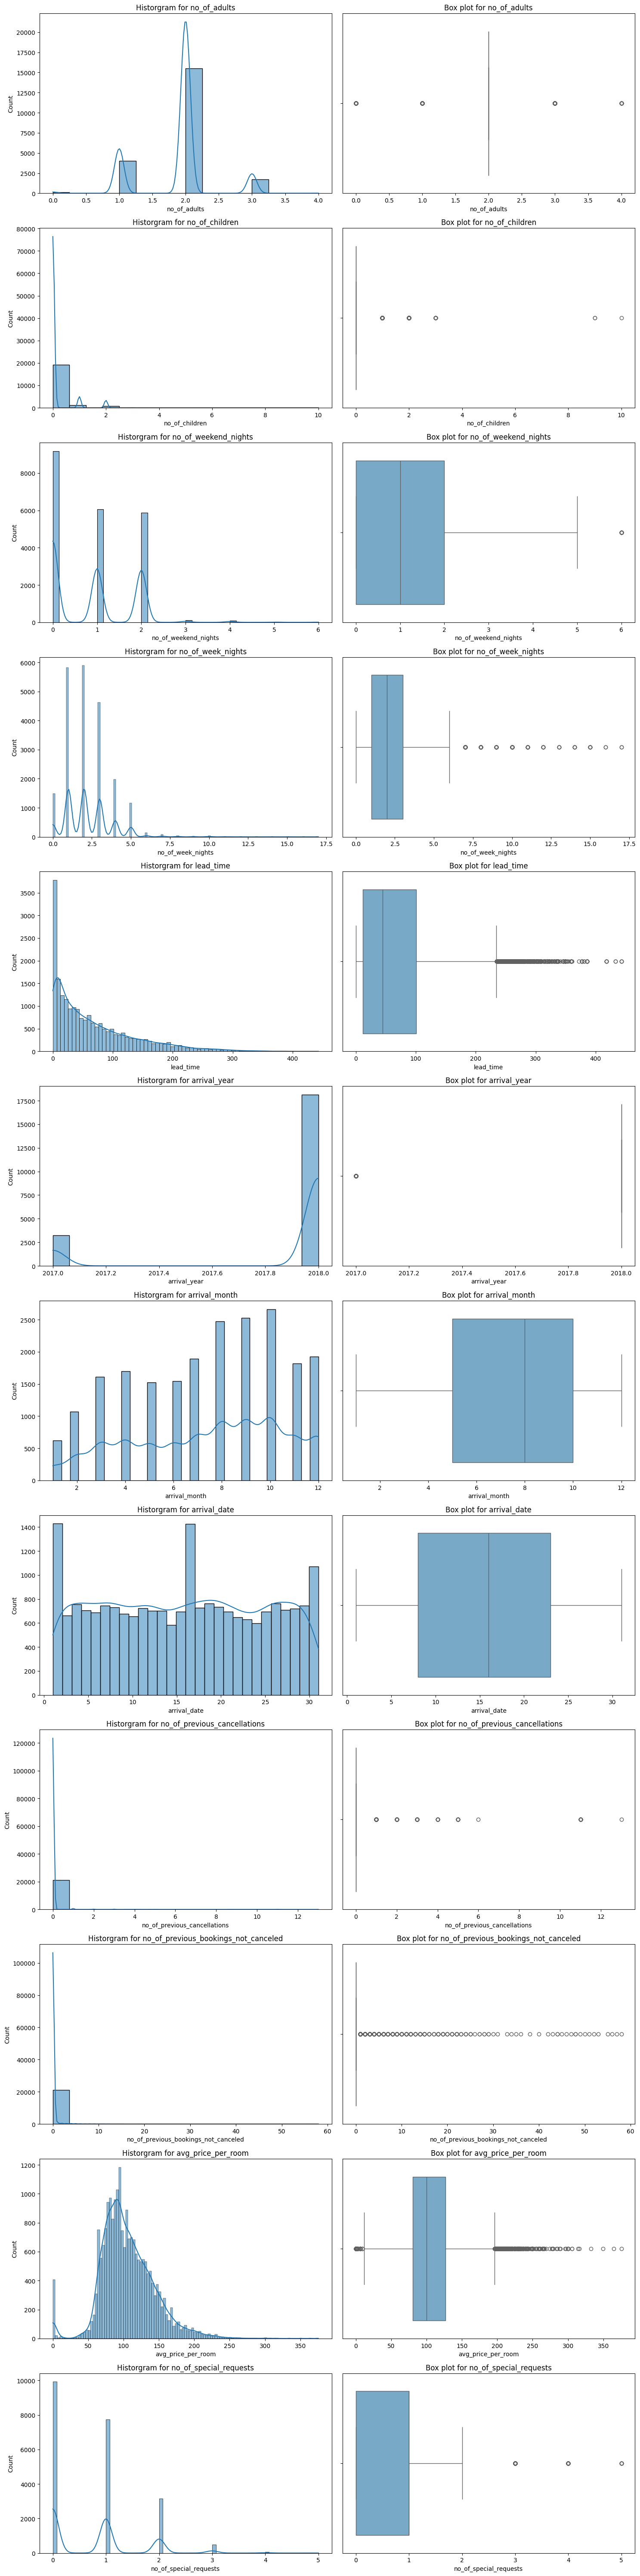

In [32]:
num_plot_distribution(data, num_col)

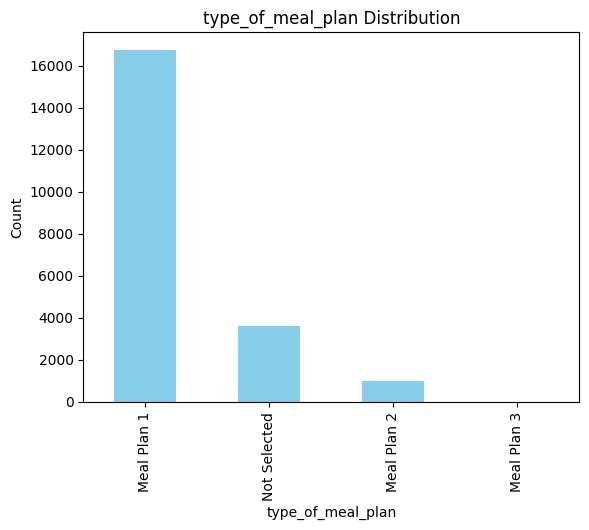

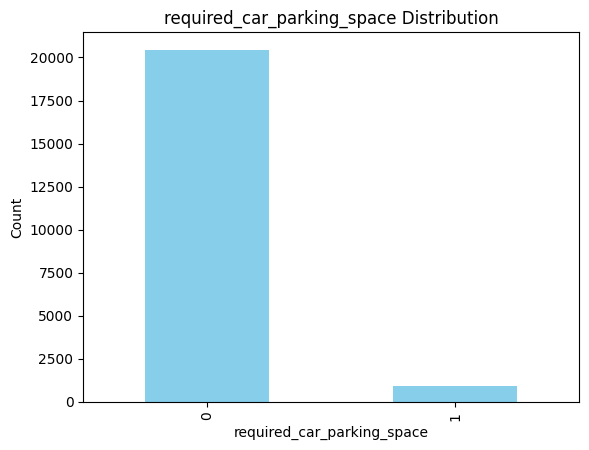

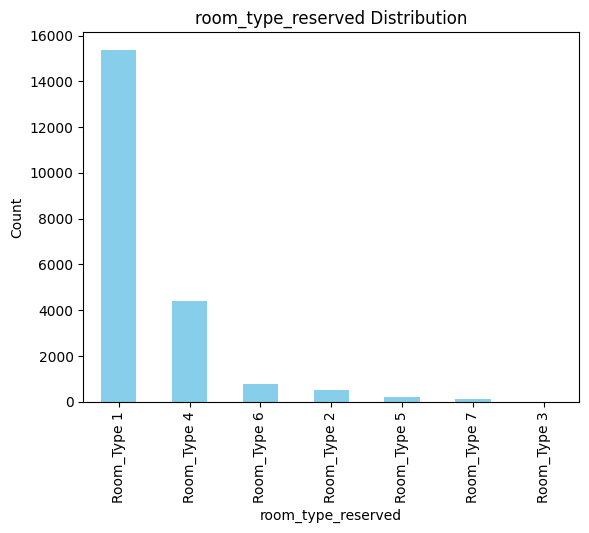

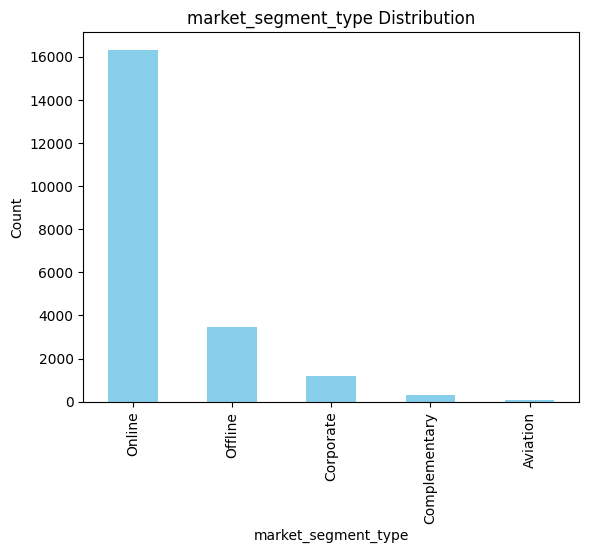

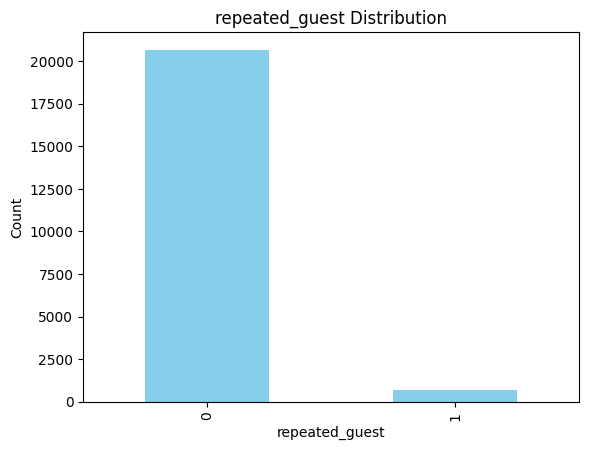

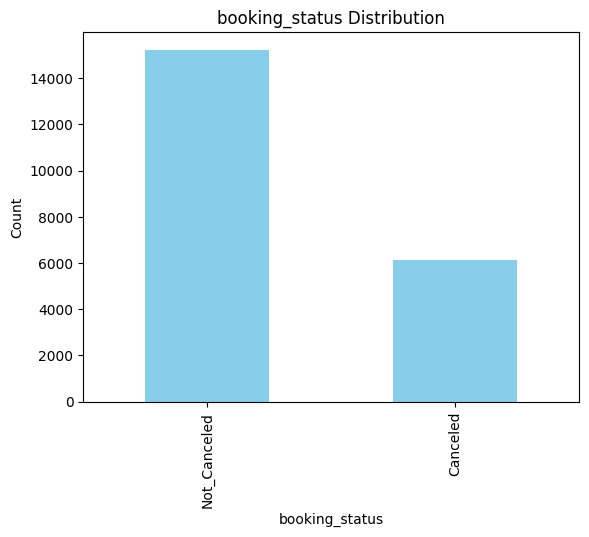

In [33]:
for cat_features in cat_col:
    plt.Figure(figsize=(10, 6))
    data[cat_features].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_features} Distribution")
    plt.xlabel(cat_features)
    plt.ylabel("Count")
    plt.show()

### bivariant analysis

In [39]:
def plot_bivaritae(df, target_col, numerical_features):
    num_plot = len(numerical_features)
    num_rows = (num_plot+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(numerical_features):
        sns.boxplot(x=target_col, y = column, ax = axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} vs {target_col}")
    plt.tight_layout()
    plt.show()

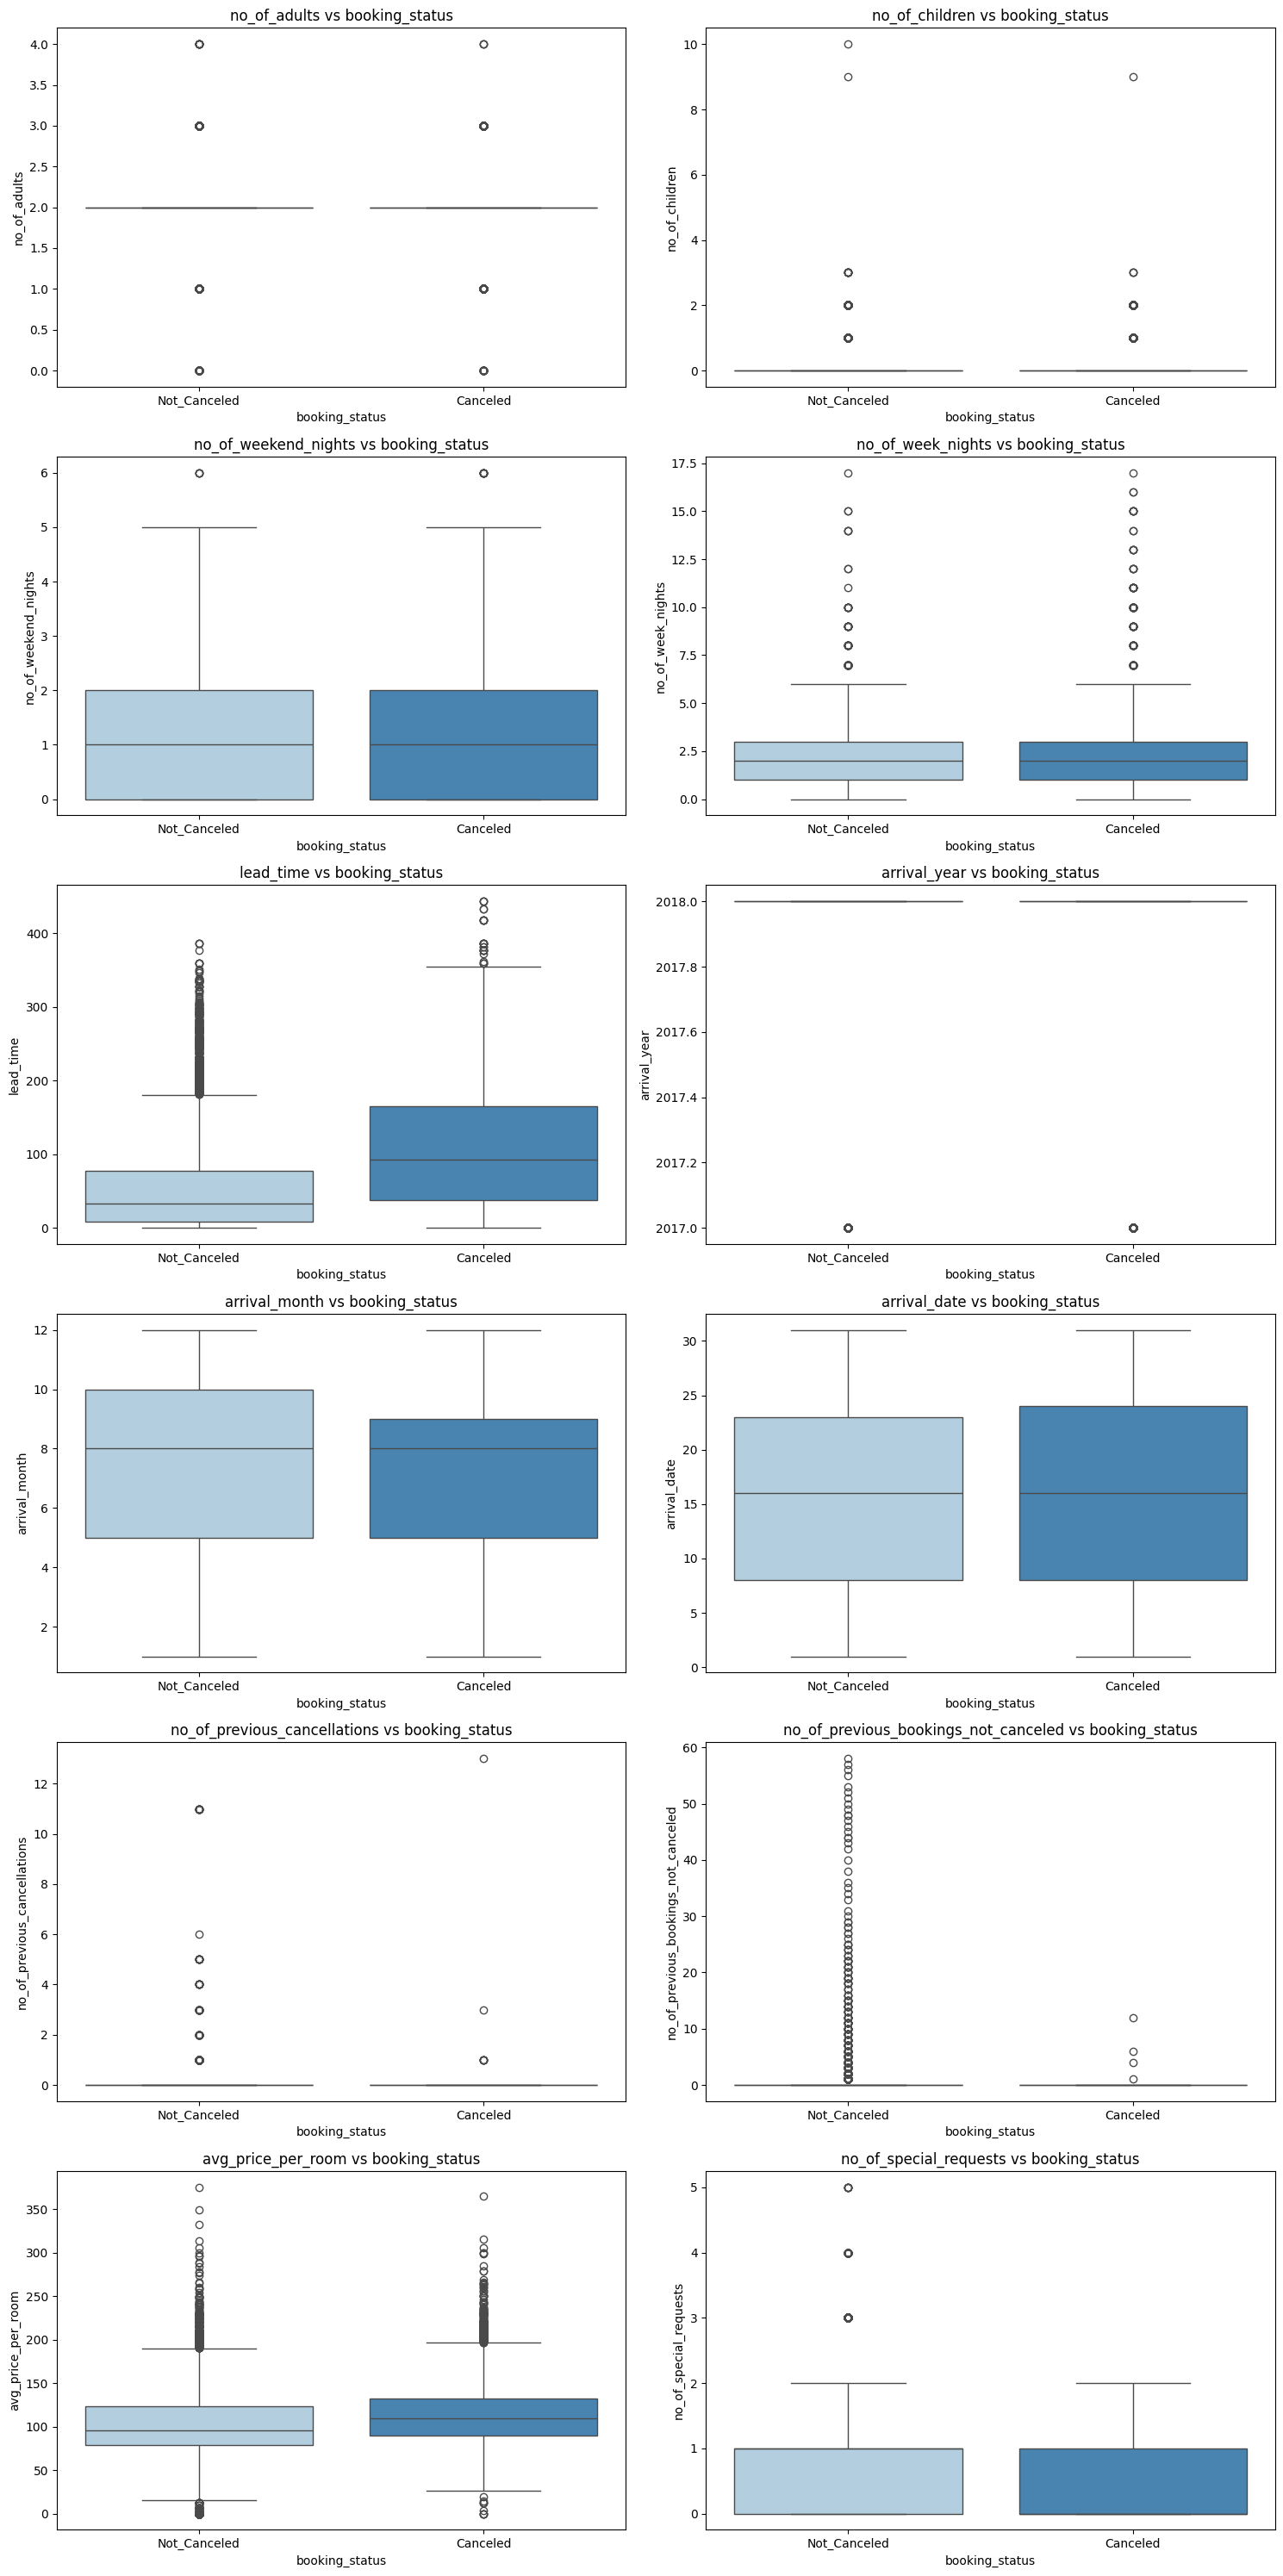

In [40]:
plot_bivaritae(data, "booking_status", num_col)

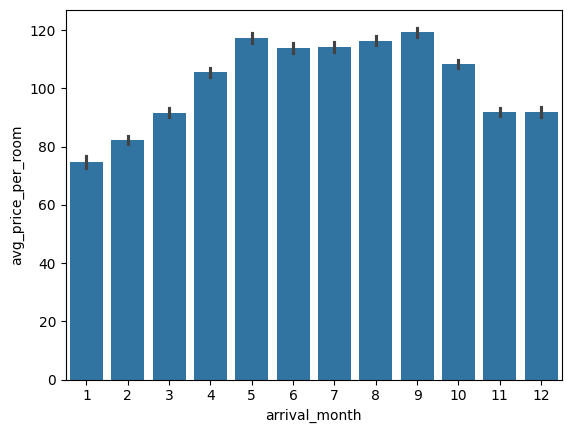

In [41]:
sns.barplot(x="arrival_month", y="avg_price_per_room", data=data)
plt.show()

In [49]:
def plot_bivariate_cat(df, target, cat_features):
    no_of_features = len(cat_features)
    num_rows = (no_of_features+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15,num_rows*5))
    axes = axes.flatten()
    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax = axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

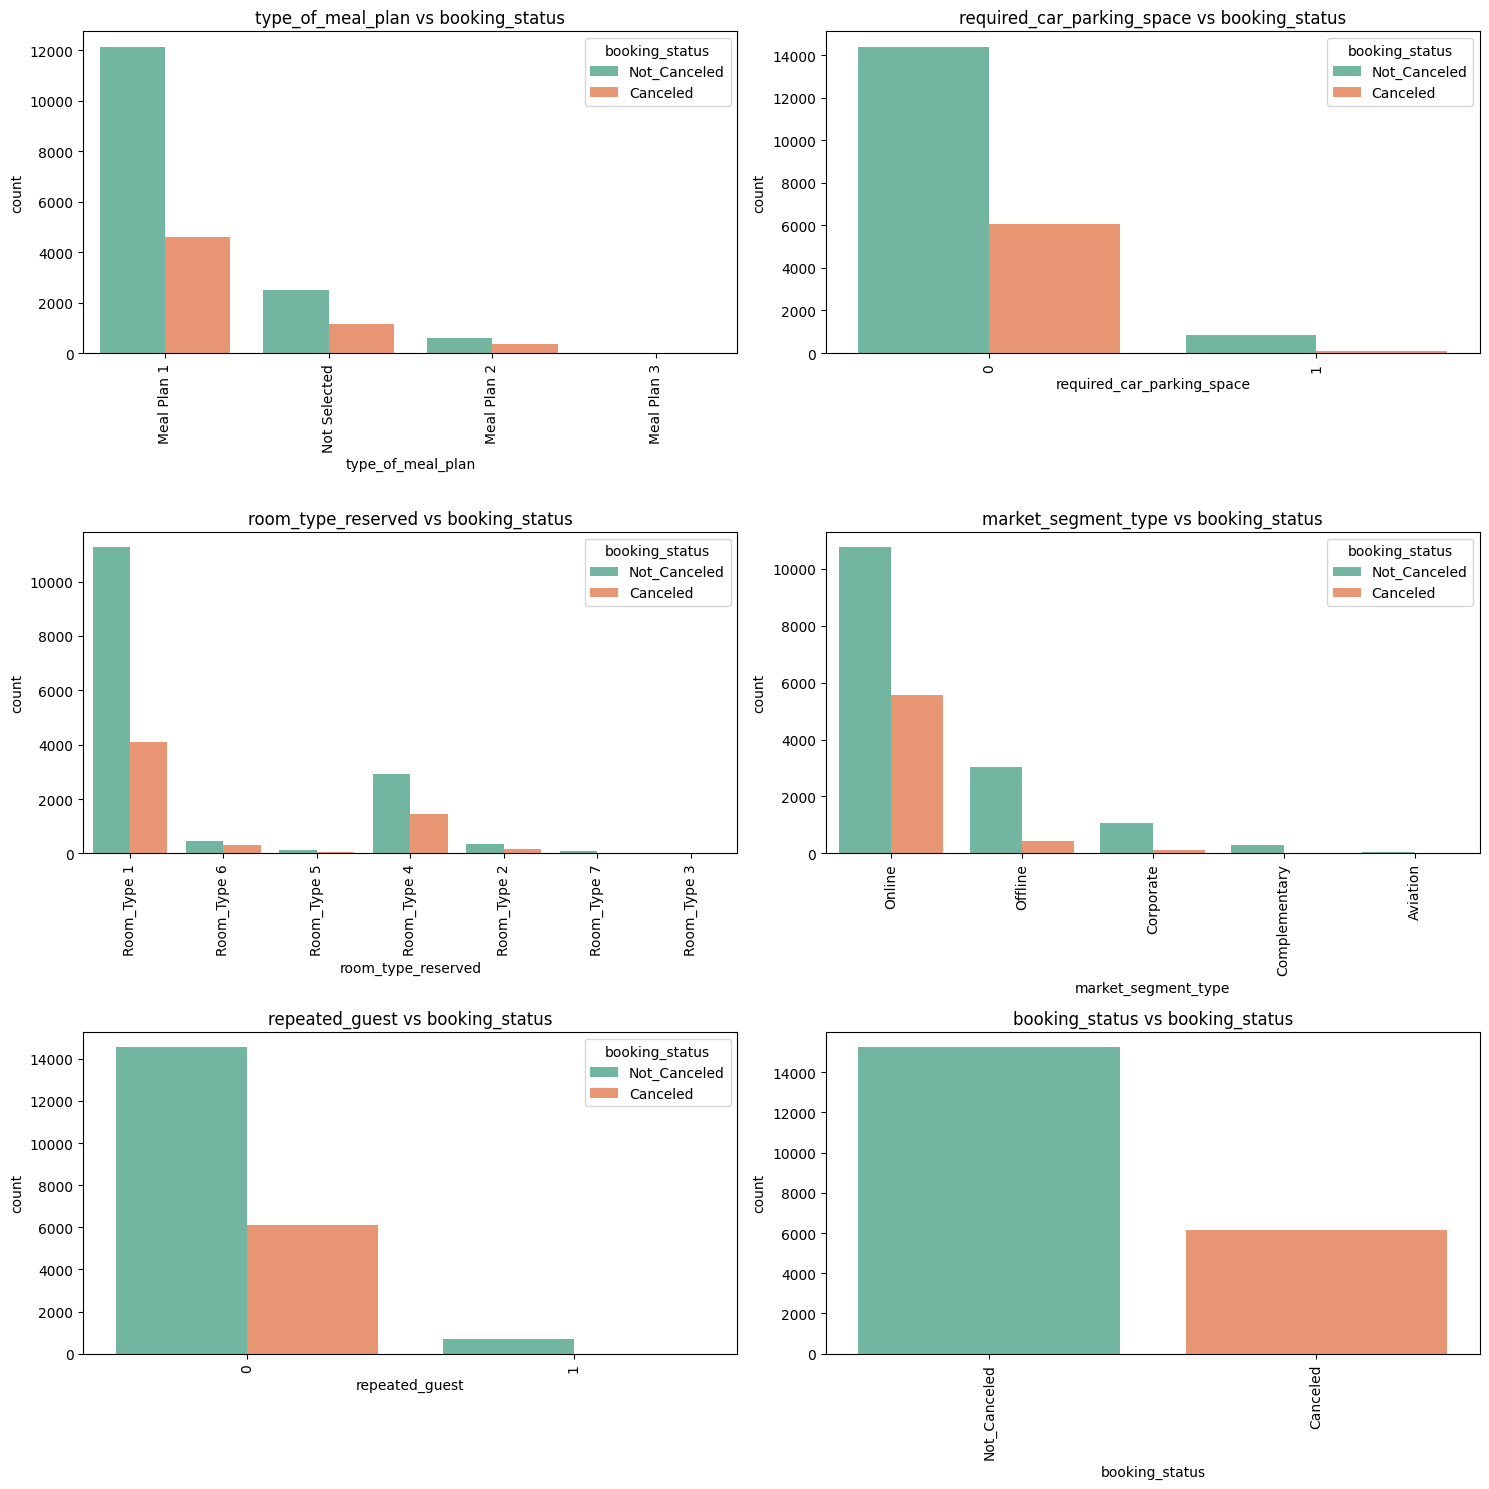

In [50]:
plot_bivariate_cat(data, "booking_status", cat_col)

In [51]:
####DATA PROCESSING

In [52]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [55]:
#### LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

In [62]:
cat_col

['type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'market_segment_type',
 'repeated_guest',
 'booking_status']

In [61]:
lb = LabelEncoder()

mapping = {}

for col in cat_col:
    df[col]=lb.fit_transform(df[col])
    #storing the mappings i.e the label and thr corrospoinding mapping 
    mapping[col] = {label: code for label, code in zip(lb.classes_ , lb.transform(lb.classes_))}


In [63]:
mapping

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [64]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [67]:
### checking multicolinarity
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 169.0 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 107.9 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [69]:
x = add_constant(df)

In [72]:
x

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,1.0,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,1.0,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,1.0,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1.0,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29012,1.0,3,0,0,1,0,0,3,65,2018,6,21,4,0,0,0,132.30,0,0
29013,1.0,2,0,2,3,0,0,0,86,2018,6,17,4,0,0,0,126.90,1,1
29014,1.0,2,0,0,2,0,0,3,0,2018,10,12,4,0,0,0,139.50,1,1
29015,1.0,2,0,2,2,0,0,0,43,2017,12,26,3,0,0,0,55.00,2,1


In [73]:
x.columns

Index(['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [74]:
vif_dataframe = pd.DataFrame()

vif_dataframe["vif_datafeature"] = x.columns

In [75]:
vif_dataframe

,vif_datafeature
0,const
1,no_of_adults
2,no_of_children
3,no_of_weekend_nights
4,no_of_week_nights
5,type_of_meal_plan
6,required_car_parking_space
7,room_type_reserved
8,lead_time
9,arrival_year


In [76]:
#calculating vif for each feature
vif_dataframe["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [77]:
vif_dataframe["VIF"]

0     4.100197e+07
1     1.341180e+00
2     1.282459e+00
3     1.073215e+00
4     1.125260e+00
5     1.178228e+00
6     1.036105e+00
7     1.549859e+00
8     1.406287e+00
9     1.288533e+00
10    1.248028e+00
11    1.003605e+00
12    1.704297e+00
13    1.765576e+00
14    1.396559e+00
15    1.712854e+00
16    1.926372e+00
17    1.267940e+00
18    1.389308e+00
Name: VIF, dtype: float64

In [79]:
#### data does not have multicolinarity

#### there is multicolinearuty if the value is above 5 and very high multicolinearity if the value is
#### above 10

In [80]:
corr = df.corr()

In [81]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

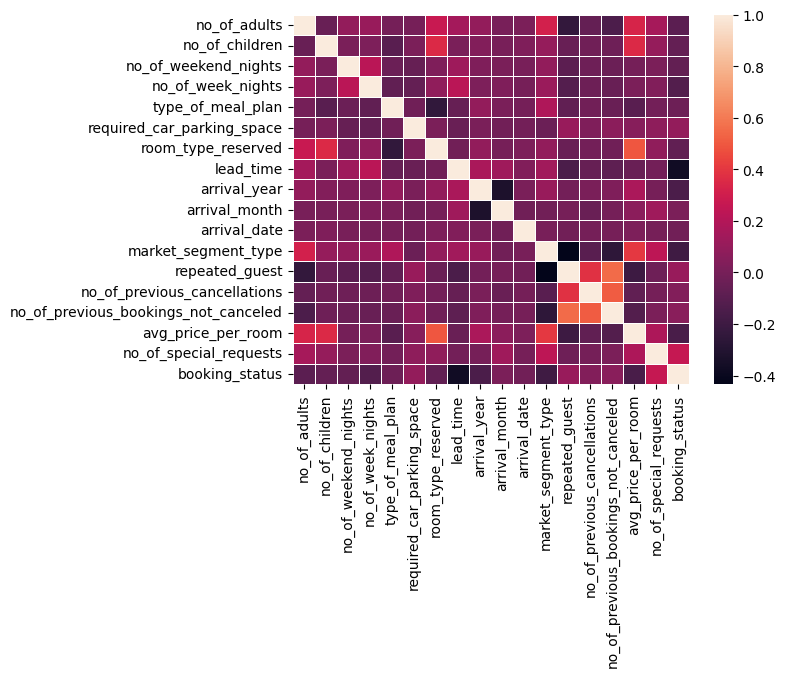

In [87]:
plt.Figure(figsize=(10, 20))
sns.heatmap(corr,linewidths=0.5)

In [88]:
#### skweness check
skewness = df.skew()

In [89]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [ ]:
"""
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934

above columns are highly skewed
"""

In [90]:
#### using log transformation for skewness handling
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])
        

In [91]:
df.skew()

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [ ]:
"""
skewness decreeases: 

no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
"""

In [93]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [95]:
"""
data is highly unbalanced

we dont do under sampling as we will have 10k rows and will reduce the size of dataset
we perform oversampling -> 30k rows ho jayega
"""

'\ndata is highly unbalanced\n\nwe dont do under sampling as we will have 10k rows and will reduce the size of dataset\nwe perform oversampling -> 30k rows ho jayega\n'

In [98]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [99]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0


In [100]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: booking_status, dtype: int64

In [101]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 551.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [102]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
#appying smot technique
smt = SMOTE(random_state=42)

X_res, y_res= smt.fit_resample(X, y)

In [107]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [108]:
df.shape

(21359, 18)

In [109]:
#creating new dataset using above resampled data
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [110]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [111]:
balanced_df.shape

(30462, 18)

In [112]:
df=balanced_df.copy()

In [113]:
df.shape

(30462, 18)

In [114]:
#### feature selection
len(df.columns)

18

In [116]:
### using random forest feature selection technique
from sklearn.ensemble import RandomForestClassifier

In [117]:

X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [118]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [121]:
feature_importance = model.feature_importances_

In [122]:
feature_importance

array([0.0177887 , 0.00689529, 0.03043602, 0.04446506, 0.02016008,
       0.01125855, 0.01927912, 0.26114017, 0.01716842, 0.08655959,
       0.08441618, 0.05847615, 0.00678902, 0.0003072 , 0.00265704,
       0.14871307, 0.18349034])

In [125]:
feature_importance_df = pd.DataFrame(
    {
        'features' : X.columns,
        'importance' : feature_importance
    }
    )

In [126]:
feature_importance_df

,features,importance
0,no_of_adults,0.017789
1,no_of_children,0.006895
2,no_of_weekend_nights,0.030436
3,no_of_week_nights,0.044465
4,type_of_meal_plan,0.020160
5,required_car_parking_space,0.011259
6,room_type_reserved,0.019279
7,lead_time,0.261140
8,arrival_year,0.017168
9,arrival_month,0.086560


In [127]:
feature_importance_df.sort_values(by="importance", ascending=False)

,features,importance
7,lead_time,0.261140
16,no_of_special_requests,0.183490
15,avg_price_per_room,0.148713
9,arrival_month,0.086560
10,arrival_date,0.084416
11,market_segment_type,0.058476
3,no_of_week_nights,0.044465
2,no_of_weekend_nights,0.030436
4,type_of_meal_plan,0.020160
6,room_type_reserved,0.019279


In [128]:
top_features = feature_importance_df.sort_values(by="importance", ascending=False)

In [129]:
len(df.columns)

18

In [130]:
### selecting top 10 features
top_10 = top_features["features"].head(10).values

In [132]:
top_10_df = df[top_10.tolist() + ["booking_status"]]

In [133]:
top_10_df.columns

Index(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved', 'booking_status'],
      dtype='object')

In [134]:
len(top_10_df)

30462

In [135]:
df = top_10_df.copy()

In [136]:
#### model selection

In [138]:
!pip install xgboost lightgbm

  Using cached xgboost-3.0.0-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 357.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 179.8 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [140]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
print(f"The length of the training data is {len(Xtrain)}")
print(f"The length of the testing data is {len(Xtest)}")
print(f"The length of the training y data is {len(ytrain)}")
print(f"The length of the training y data is {len(ytest)}")

The length of the training data is 24369
The length of the testing data is 6093
The length of the training y data is 24369
The length of the training y data is 6093


In [146]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "GradientBoostingClassifier" : GradientBoostingClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "DecisionTreeClassifier" : DecisionTreeClassifier(random_state=42),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "GaussianNB" : GaussianNB(),
    "XGBClassifier" : XGBClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(random_state=42),
    "LGBMClassifier" : LGBMClassifier(random_state=42)
}

In [147]:
metrics = {
    "Model" : [],
    "accuracy_score" : [],
    "precision_score" : [],
    "recall_score" : [],
    "f1_score" : []
}

In [148]:
for model_name, classifier in classifiers.items():
    classifier.fit(Xtrain, ytrain)

    ypred = classifier.predict((Xtest))

    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    recall = recall_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)

    metrics["Model"].append(model_name)
    metrics["accuracy_score"].append(accuracy)
    metrics["precision_score"].append(precision)
    metrics["recall_score"].append(recall)
    metrics["f1_score"].append(f1)



[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [149]:
metric_df = pd.DataFrame(metrics)

In [150]:
metric_df

,Model,accuracy_score,precision_score,recall_score,f1_score
0,Random Forest,0.889710,0.891574,0.889251,0.890411
1,LogisticRegression,0.775152,0.803571,0.732899,0.766610
2,GradientBoostingClassifier,0.835221,0.817846,0.865798,0.841139
3,SVC,0.720171,0.729412,0.706840,0.717949
4,DecisionTreeClassifier,0.840144,0.850736,0.828013,0.839221
5,KNeighborsClassifier,0.779255,0.855964,0.675570,0.755143
6,GaussianNB,0.773182,0.803161,0.728339,0.763922
7,XGBClassifier,0.872641,0.868573,0.880456,0.874474
8,AdaBoostClassifier,0.804366,0.800769,0.814332,0.807494
9,LGBMClassifier,0.865255,0.850421,0.888925,0.869247


In [154]:
#get the top 3 model based on accuracy
metric_df.sort_values(by="accuracy_score",ascending=False, inplace=True)

In [155]:
metric_df

,Model,accuracy_score,precision_score,recall_score,f1_score
0,Random Forest,0.889710,0.891574,0.889251,0.890411
7,XGBClassifier,0.872641,0.868573,0.880456,0.874474
9,LGBMClassifier,0.865255,0.850421,0.888925,0.869247
4,DecisionTreeClassifier,0.840144,0.850736,0.828013,0.839221
2,GradientBoostingClassifier,0.835221,0.817846,0.865798,0.841139
8,AdaBoostClassifier,0.804366,0.800769,0.814332,0.807494
5,KNeighborsClassifier,0.779255,0.855964,0.675570,0.755143
1,LogisticRegression,0.775152,0.803571,0.732899,0.766610
6,GaussianNB,0.773182,0.803161,0.728339,0.763922
3,SVC,0.720171,0.729412,0.706840,0.717949


In [ ]:
"""
The top 3 models are:
    Model	        accuracy_score	precision_score	recall_score	f1_score
0	Random Forest	0.889710	    0.891574	    0.889251	    0.890411
7	XGBClassifier	0.872641	    0.868573	    0.880456	    0.874474
9	LGBMClassifier	0.865255	    0.850421	    0.888925	    0.869247
"""

In [ ]:
### train the random forest model

In [156]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [157]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [158]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
rf = RandomForestClassifier(random_state=42)


In [160]:
params = {
    'n_estimators': randint(100, 500),
    'max_depth' : randint(10, 50),
    'min_samples_split' : randint(2, 10),
    'min_samples_leaf' : randint(1, 5),
    'bootstrap' : [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator= rf,
    param_distributions= params,
    n_iter = 5,
    cv = 5,
    verbose = True,
    random_state=42,
    scoring = "accuracy"
)

In [162]:
random_search.fit(Xtrain, ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1239b2000>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x123cd8560>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x123cd9d60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x123cd9040>},
                   random_state=42, scoring='accuracy', verbose=True)

In [163]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [164]:
best_rf = random_search.best_estimator_

In [166]:
ypred = best_rf.predict(Xtest)

In [167]:
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

In [168]:
print(f"accuracy : {accuracy} , \n  precision : {precision} , \n recall : {recall} , \n f1 : {f1}")

accuracy : 0.8910224848186443 , 
  precision : 0.8888170652876535 , 
 recall : 0.8957654723127035 , 
 f1 : 0.8922777417261518


In [169]:
### saving the model
import joblib

In [170]:
joblib.dump(best_rf, "random_forest.pkl")

['random_forest.pkl']

In [171]:
loaded_model = joblib.load("random_forest.pkl")

In [172]:
Xtrain[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [174]:
d = np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1, -1)

In [177]:
d

array([[190. ,   1. ,  93.5,   9. ,   8. ,   4. ,   5. ,   2. ,   0. ,
          0. ]])

In [176]:
output = loaded_model.predict(d)

In [178]:
output

array([1])

In [179]:
ytrain[0:1]

4157    1
Name: booking_status, dtype: int64